In [1]:
print("Hello world!")

Hello world!


In [ ]:
from CraftTraining.module import CraftLightningModule
from CraftTraining.datamodule import CraftDataModule

%run CraftTraining/main_fittest.py --config CraftTraining/config/craft.yaml 

# %run CraftTraining/main.py fit --config CraftTraining/config/craft.yaml
# %run CraftTraining/main.py test --config CraftTraining/config/craft.yaml --ckpt_path best
# %run CraftTraining/main.py predict --config CraftTraining/config/craft.yaml --ckpt_path best

c:\Users\91838\Desktop\image-to-physical\.venv\Lib\site-packages\lightning\fabric\utilities\seed.py:44: No seed found, seed set to 0
Seed set to 0
c:\Users\91838\Desktop\image-to-physical\.venv\Lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
c:\Users\91838\Desktop\image-to-physical\.venv\Lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)



[CraftNet Info:] 
Backbone: vgg16_bn, 
pretrained=False, 
feature_extract=False
freeze_until='None' 
trainable params: 17470882/17470882



GPU available: False, used: False
TPU available: False, using: 0 TPU cores



Loading all ('.png', '.jpg', '.jpeg', '.tif', '.tiff', '.bmp') from C:/CraftData/data\Training\Input
Found 10 images.


Loading all ('.png', '.jpg', '.jpeg', '.tif', '.tiff', '.bmp') from C:/CraftData/data\Validation\Input
Found 10 images.




  | Name  | Type     | Params | Mode  | FLOPs
---------------------------------------------------
0 | model | CraftNet | 17.5 M | train | 0    
---------------------------------------------------
17.5 M    Trainable params
0         Non-trainable params
17.5 M    Total params
69.884    Total estimated model params size (MB)
88        Modules in train mode
0         Modules in eval mode
0         Total Flops
c:\Users\91838\Desktop\image-to-physical\.venv\Lib\site-packages\lightning\pytorch\trainer\connectors\data_connector.py:434: The 'train_dataloader' does not have many workers which may be a bottleneck. Consider increasing the value of the `num_workers` argument` to `num_workers=3` in the `DataLoader` to improve performance.
c:\Users\91838\Desktop\image-to-physical\.venv\Lib\site-packages\torch\utils\data\dataloader.py:668: UserWarning: 'pin_memory' argument is set as true but no accelerator is found, then device pinned memory won't be used.
  warnings.warn(warn_msg)
c:\Users\91838\

Training: |          | 0/? [00:00<?, ?it/s]

🚀 Training started on device: cpu
⚠️ CUDA NOT available — running on CPU!


Epoch 0:  50%|█████     | 2/4 [01:49<01:49,  0.02it/s, v_num=0, train_loss=1.460]


Loading all ('.png', '.jpg', '.jpeg', '.tif', '.tiff', '.bmp') from C:/CraftData/data\Training\Input
Found 10 images.


Loading all ('.png', '.jpg', '.jpeg', '.tif', '.tiff', '.bmp') from C:/CraftData/data\Validation\Input
Found 10 images.

<class 'torch.Tensor'> torch.Size([2, 1, 512, 512])
region_mode: 4
number of polygons: 72
region: torch.Size([1, 512, 512]) min= 0.0 max= 1.0 mean= 0.05145891755819321
affinity: torch.Size([1, 512, 512]) min= 0.0 max= 0.4485686123371124 mean= 0.011802205815911293


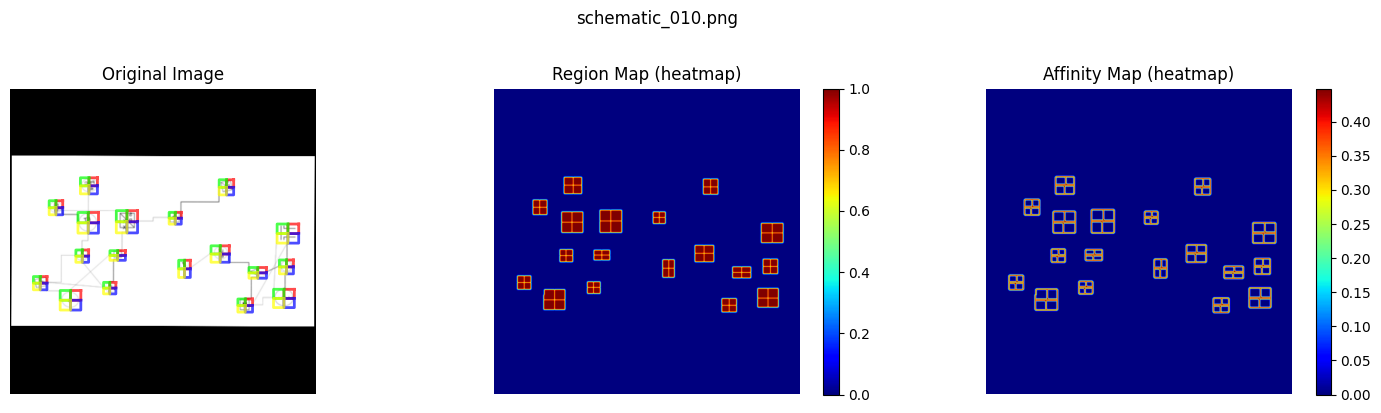

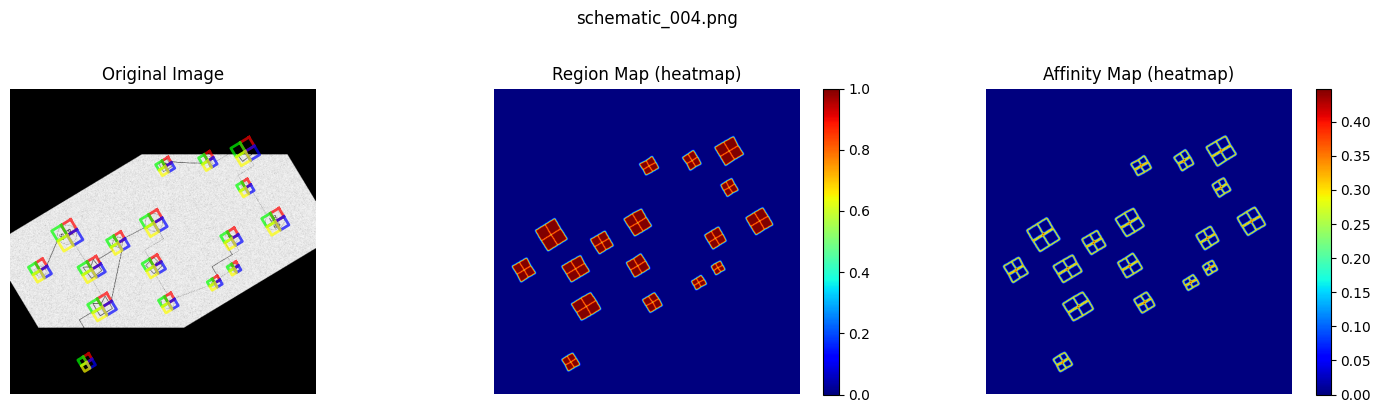

In [5]:
# Visualize one batch of data and test datamodule output
"""This script visualizes one batch of images from the CraftDataModule to verify data loading and augmentation
   and prints the type and shape of the images tensor to verify correct data loading and batching."""

import importlib
import utils.craftImagevisualization
importlib.reload(utils.craftImagevisualization)

from CraftTraining.datamodule import CraftDataModule
from utils.craftImagevisualization import visualizeOneBatchImages, visualizeOneBatchWithMaps, visualizeOneBatchWithMapsMatplotlib

dm = CraftDataModule(
    data_dir="C:/CraftData/data",
    batch_size=2,
    num_workers=0,
    resize=512,
    gauss_cfg={
        "gauss_init_size": 200,
        "gauss_sigma": 3,  # Reduced blur to keep regions separate
        "enlarge_region": [0.0, 0.0],  # No dilation to prevent merging
        "enlarge_affinity": [0.3, 0.3],  # Small dilation for affinity links
        "min_sigma": 1.0
    },
    data_cfg={
        "region": 4,  # 0=word/char, 1=symbols no split, 2=split into 2, 3=split into 3, 4=split into 4 (2x2 grid)
        "custom_aug": {
            "random_rotate": {"option": True, "max_angle": 45},
            "random_horizontal_flip": {"option": True}
        }
    }
)
dm.setup("fit")
batch = next(iter(dm.train_dataloader()))
images, targets, names = batch
print(type(images), images.shape)

# Optional: basic statistics for first sample maps
first_target = targets[0]
region = first_target["region"]
affinity = first_target["affinity"]
region_mode = first_target.get("region_mode", 0)
num_polys = len(first_target.get("polys", []))
print(f"region_mode: {region_mode}")
print(f"number of polygons: {num_polys}")
print("region:", region.shape, "min=", float(region.min()), "max=", float(region.max()), "mean=", float(region.mean()))
print("affinity:", affinity.shape, "min=", float(affinity.min()), "max=", float(affinity.max()), "mean=", float(affinity.mean()))

# Visualize polygons only (OpenCV window)
visualizeOneBatchImages(batch)

# OpenCV visualization with region/affinity maps (separate panels + overlays)
visualizeOneBatchWithMaps(batch)

# Matplotlib visualization (3 panels: image, region, affinity)
visualizeOneBatchWithMapsMatplotlib(batch)


In [2]:
# Test CraftMetrics with synthetic data
"""this test creates synthetic ground truth and predicted polygons for multiple images,
then computes detection metrics using IoS-based matching."""

%run utils/craftmetrics.py


📊 Final Metrics Summary (IoS-only matching):
precision: 0.7123
recall: 0.6711
hmean: 0.6911
tp: 151
fp: 61
fn: 74
num_images: 9
details: [{'image': 'image_01.jpg', 'matches': [(2, 5, 0.576), (2, 7, 0.5573333333333333), (2, 13, 0.7666666666666667), (3, 8, 0.7206666666666667), (5, 14, 0.704), (7, 6, 0.656), (7, 15, 0.7733333333333333), (9, 2, 0.65), (11, 4, 0.658), (11, 10, 0.6933333333333334), (11, 11, 0.656), (12, 1, 0.6906666666666667), (14, 0, 0.576), (14, 9, 0.57), (19, 19, 0.512)], 'tp': 15, 'fp': 6, 'fn': 11}, {'image': 'image_02.jpg', 'matches': [(0, 3, 0.5133333333333333), (1, 16, 0.7), (2, 1, 0.7093333333333334), (3, 6, 0.6333333333333333), (4, 9, 0.644), (5, 5, 0.5226666666666666), (6, 16, 0.846), (8, 4, 0.686), (8, 7, 0.5333333333333333), (9, 7, 0.65), (10, 1, 0.608), (12, 18, 0.5826666666666667), (13, 2, 0.7733333333333333), (16, 8, 0.644), (17, 0, 0.6286666666666667), (18, 16, 0.69), (19, 2, 0.738), (19, 12, 0.9)], 'tp': 18, 'fp': 8, 'fn': 4}, {'image': 'image_03.jpg', 'ma